In [101]:
import pandas as pd
import numpy as np
import statistics as st
import sklearn
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn import preprocessing
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import pylab
import re
%matplotlib inline 

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x113745e10>>
Traceback (most recent call last):
  File "/anaconda3/envs/ML/lib/python3.6/site-packages/xgboost/core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [102]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [103]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [104]:
import xgboost as xgb

In [105]:
print('Train shape : ', train.shape)

Train shape :  (913000, 4)


In [106]:
'''
def convert_dates(x):
    for date in x['date']:
        year, month, date = date.split('-')
        x['year'] = year
        x['month'] = month
        x['date'] = date
        
    return x
'''    

"\ndef convert_dates(x):\n    for date in x['date']:\n        year, month, date = date.split('-')\n        x['year'] = year\n        x['month'] = month\n        x['date'] = date\n        \n    return x\n"

In [107]:
# convert_dates(train)

In [108]:
train['date'].head()

0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
4    2013-01-05
Name: date, dtype: object

In [109]:
pd.to_datetime(train['date'])

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
5        2013-01-06
6        2013-01-07
7        2013-01-08
8        2013-01-09
9        2013-01-10
10       2013-01-11
11       2013-01-12
12       2013-01-13
13       2013-01-14
14       2013-01-15
15       2013-01-16
16       2013-01-17
17       2013-01-18
18       2013-01-19
19       2013-01-20
20       2013-01-21
21       2013-01-22
22       2013-01-23
23       2013-01-24
24       2013-01-25
25       2013-01-26
26       2013-01-27
27       2013-01-28
28       2013-01-29
29       2013-01-30
            ...    
912970   2017-12-02
912971   2017-12-03
912972   2017-12-04
912973   2017-12-05
912974   2017-12-06
912975   2017-12-07
912976   2017-12-08
912977   2017-12-09
912978   2017-12-10
912979   2017-12-11
912980   2017-12-12
912981   2017-12-13
912982   2017-12-14
912983   2017-12-15
912984   2017-12-16
912985   2017-12-17
912986   2017-12-18
912987   2017-12-19
912988   2017-12-20


In [110]:
def convert_dates(x):
    x['year'] = pd.DatetimeIndex(x['date']).year
    x['month'] = pd.DatetimeIndex(x['date']).month
    x['dayofweek'] = pd.DatetimeIndex(x['date']).dayofweek
        
    return x
         

In [111]:
pd.DatetimeIndex(train['date']).dayofweek

Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6],
           dtype='int64', name='date', length=913000)

In [112]:
convert_dates(train).head(10)

,date,store,item,sales,year,month,dayofweek
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5
5,2013-01-06,1,1,12,2013,1,6
6,2013-01-07,1,1,10,2013,1,0
7,2013-01-08,1,1,9,2013,1,1
8,2013-01-09,1,1,12,2013,1,2
9,2013-01-10,1,1,9,2013,1,3


In [113]:
train = convert_dates(train)
test = convert_dates(test)

In [114]:
train.tail()

,date,store,item,sales,year,month,dayofweek
912995,2017-12-27,10,50,63,2017,12,2
912996,2017-12-28,10,50,59,2017,12,3
912997,2017-12-29,10,50,74,2017,12,4
912998,2017-12-30,10,50,62,2017,12,5
912999,2017-12-31,10,50,82,2017,12,6


In [115]:
train.groupby(['item','store','dayofweek']).mean().head()

sales         year     month
item store dayofweek                                  
1    1     0          15.584615  2015.000000  6.530769
           1          18.168582  2014.992337  6.540230
           2          18.793103  2014.996169  6.528736
           3          19.452107  2015.000000  6.509579
           4          21.015326  2015.003831  6.501916

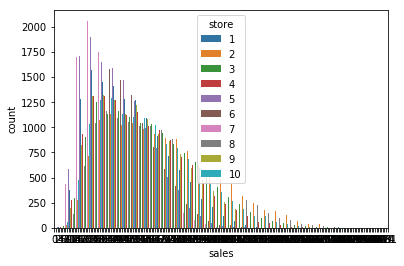

In [116]:
sns.countplot('sales', data=train, hue='store')

In [117]:
def make_ave(df):
    df['daily_ave'] = df.groupby(['item','store','dayofweek'])['sales'].transform('mean')
    df['monthly_ave'] = df.groupby(['item','store','month'])['sales'].transform('mean')
    
    return df

In [118]:
make_ave(train).head()

,date,store,item,sales,year,month,dayofweek,daily_ave,monthly_ave
0,2013-01-01,1,1,13,2013,1,1,18.168582,13.709677
1,2013-01-02,1,1,11,2013,1,2,18.793103,13.709677
2,2013-01-03,1,1,14,2013,1,3,19.452107,13.709677
3,2013-01-04,1,1,13,2013,1,4,21.015326,13.709677
4,2013-01-05,1,1,10,2013,1,5,22.973180,13.709677


In [119]:
train = make_ave(train).head()

In [120]:
daily_ave = train.groupby(['item','store','dayofweek'])['sales'].mean().reset_index()

monthly_ave = train.groupby(['item','store','month'])['sales'].mean().reset_index()


In [121]:
daily_ave.head()

,item,store,dayofweek,sales
0,1,1,1,13
1,1,1,2,11
2,1,1,3,14
3,1,1,4,13
4,1,1,5,10


In [123]:
def merge(x,y,col,col_name):
    x =pd.merge(x, y, how='left', on=None, left_on=col, right_on=col,
            left_index=False, right_index=False, sort=True,
             copy=True, indicator=False,validate=None)
    x=x.rename(columns={'sales':col_name})
    return x

In [124]:
test = merge(test, daily_ave,['item','store','dayofweek'],'daily_avg')
test = merge(test, monthly_ave,['item','store','month'],'monthly_avg')

In [125]:
train.head()

,date,store,item,sales,year,month,dayofweek,daily_ave,monthly_ave
0,2013-01-01,1,1,13,2013,1,1,18.168582,13.709677
1,2013-01-02,1,1,11,2013,1,2,18.793103,13.709677
2,2013-01-03,1,1,14,2013,1,3,19.452107,13.709677
3,2013-01-04,1,1,13,2013,1,4,21.015326,13.709677
4,2013-01-05,1,1,10,2013,1,5,22.973180,13.709677


In [126]:
test.head()

,id,date,store,item,year,month,dayofweek,daily_avg,monthly_avg
0,0,2018-01-01,1,1,2018,1,0,NaN,12.2
1,7,2018-01-08,1,1,2018,1,0,NaN,12.2
2,14,2018-01-15,1,1,2018,1,0,NaN,12.2
3,21,2018-01-22,1,1,2018,1,0,NaN,12.2
4,28,2018-01-29,1,1,2018,1,0,NaN,12.2


In [130]:
train.head()

,date,store,item,sales,year,month,dayofweek,daily_ave,monthly_ave
0,2013-01-01,1,1,13,2013,1,1,18.168582,13.709677
1,2013-01-02,1,1,11,2013,1,2,18.793103,13.709677
2,2013-01-03,1,1,14,2013,1,3,19.452107,13.709677
3,2013-01-04,1,1,13,2013,1,4,21.015326,13.709677
4,2013-01-05,1,1,10,2013,1,5,22.973180,13.709677


In [132]:
Y = train.sales

In [140]:
X = train.drop(['sales','date'], axis=1)

In [141]:
print(Y.shape)
print(X.shape)


(5,)
(5, 7)


In [153]:
Y = Y.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [143]:
log_model = LogisticRegression()
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
log_model.score(X, Y)

0.6

In [147]:
from pandas import Series, DataFrame

coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T
coeff_df

,0,1
0,store,-4.76692e-06
1,item,-4.76692e-06
2,year,-0.0095958
3,month,-4.76692e-06
4,dayofweek,0.440778
5,daily_ave,0.778356
6,monthly_ave,-6.53529e-05


In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
log_model2 = LogisticRegression()
log_model2.fit(X_train, Y_train)
class_predict = log_model2.predict(X_test)

In [150]:
class_predict

array([10, 13])

In [152]:
from sklearn import metrics

metrics.accuracy_score(Y_test, class_predict)

0.0

In [100]:
param_dist = {'objective':'binary:logistic', 'n_estimators':2}

clf = xgb.XGBModel(param_dist)

clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='logloss',
        verbose=True)

evals_result = clf.evals_result()

NameError: name 'X_train' is not defined